In [1]:
#DQLab Capstone Project TETRIS 2024
#By Indira Ayu (TETRIS-106)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
import squarify as sq

sns.set_theme(style='darkgrid')

In [29]:
#Importing data from excel file
tea_areaprod = pd.read_excel('Project_data.xlsx', sheet_name=0)
tea_prod = pd.read_excel('Project_data.xlsx', sheet_name=1)
tea_eximp = pd.read_excel('Project_data.xlsx', sheet_name=2)
export_comp = pd.read_excel('Project_data.xlsx', sheet_name=4)
global_prod_pct = pd.read_excel('Project_data.xlsx', sheet_name=5)

In [3]:
#Exploring data 1: Percentage share of global tea production
global_prod_pct

,country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,China,0.383,0.401,0.424,0.430,0.437,0.438,0.454,0.475,0.475,0.491
1,India,0.239,0.231,0.227,0.227,0.231,0.224,0.226,0.200,0.208,0.211
2,Kenya,0.087,0.086,0.076,0.085,0.077,0.083,0.074,0.091,0.083,0.083
3,Sri Lanka,0.067,0.065,0.062,0.053,0.054,0.051,0.049,0.044,0.046,0.039
4,Turkey,0.047,0.047,0.049,0.045,0.045,0.047,0.043,0.045,0.044,0.038
5,Vietnam,0.036,0.033,0.032,0.032,0.031,0.031,0.031,0.031,0.028,0.027
6,Indonesia,0.029,0.027,0.025,0.025,0.023,0.022,0.021,0.020,0.020,0.019
7,Japan,0.017,0.016,0.014,0.014,0.014,0.014,0.012,0.011,0.011,0.011
8,Argentina,0.016,0.016,0.016,0.015,0.014,0.013,0.012,0.012,0.011,0.011
9,Others,0.079,0.078,0.075,0.074,0.074,0.077,0.078,0.071,0.074,0.070


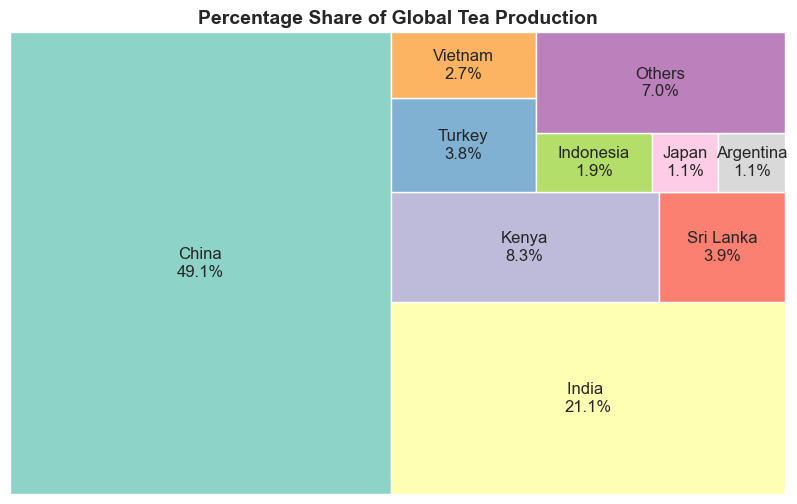

In [4]:
#Visualizing Tea Production Proportion in 2022
labels = [f"{country}\n{value:.1%}" 
          for country, value in 
          zip(global_prod_pct['country'], global_prod_pct[2022])]

plt.figure(figsize=(10, 6))
sq.plot(sizes=global_prod_pct[2022], label=labels, 
              color=sns.color_palette('Set3',len(global_prod_pct[2022])))

plt.title('Percentage Share of Global Tea Production', fontweight='bold', fontsize=14)
plt.axis('off')  

plt.show()


In [5]:
#Exploring data 2: National tea production area (Ha)
tea_areaprod

,tahun,luas_PBN,luas_PBS,luas_PR,total_luas
0,2002,44608,39810,66289,150707
1,2003,41988,36874,64742,143604
2,2004,44768,35878,61902,142548
3,2005,44066,34284,60771,139121
4,2006,46661,27939,60990,135590
5,2007,42579,30207,60948,133734
6,2008,38946,28227,60539,127712
7,2009,38564,27816,57126,123506
8,2010,38750,27683,56465,122898
9,2011,38609,29346,55983,123938


In [6]:
#Finding the maximum production area value
max_idx= tea_areaprod['total_luas'].idxmax()
max_areaprod = tea_areaprod['total_luas'].loc[max_idx]
yearmax_areaprod = tea_areaprod['tahun'].loc[max_idx]
print(max_areaprod, yearmax_areaprod)

150707 2002


In [7]:
#Calculating the difference between current value and the maximum value
curr_year_idx = tea_areaprod['tahun'].idxmax()
curr_areaprod = tea_areaprod['total_luas'].loc[curr_year_idx]
pct_diff = (curr_areaprod - max_areaprod)/max_areaprod
print(f"{pct_diff:.1%}")

-32.8%


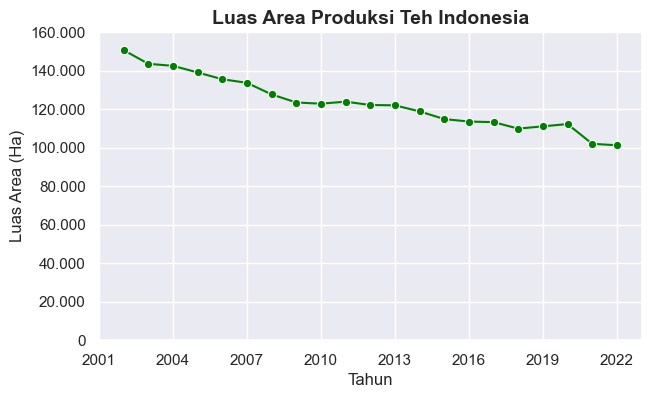

In [8]:
#Visualizing tea production area trend over time
plt.figure(figsize=(7,4))
sns.lineplot(data=tea_areaprod, x='tahun', y='total_luas', marker='o', color='green')

#Set the x-axis ticks to integers
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.ylim(0,160000)

#Add labels and title
plt.xlabel('Tahun')
plt.ylabel('Luas Area (Ha)')
plt.title('Luas Area Produksi Teh Indonesia', fontweight='bold', fontsize=14)

#Format y-axis with '.' as the thousand separator
def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

#Show the plot
plt.show()

In [9]:
#Exploring data 3: National tea production (tonnes)
tea_prod

,tahun,prod_PBN,prod_PBS,prod_PR,total_prod
0,2002,80426,39995,44773,165194
1,2003,82082,40660,47079,169821
2,2004,89303,36448,40200,165951
3,2005,89959,38386,37746,166091
4,2006,81847,27657,37355,146859
5,2007,80274,31012,38937,150223
6,2008,78354,37024,38593,153971
7,2009,75451,36211,45239,156901
8,2010,73524,32133,50947,156604
9,2011,65144,34125,51507,150776


In [10]:
#Finding the maximum production value
max_idx= tea_prod['total_prod'].idxmax()
max_prod = tea_prod['total_prod'].loc[max_idx]
yearmax_prod = tea_prod['tahun'].loc[max_idx]
print(max_prod, yearmax_prod)

169821 2003


In [11]:
#Calculating the difference between current value and the maximum value
curr_year_idx = tea_prod['tahun'].idxmax()
curr_prod = tea_prod['total_prod'].loc[curr_year_idx]
pct_diff = (curr_prod - max_prod)/max_prod
print(f"{pct_diff:.1%}")

-26.6%


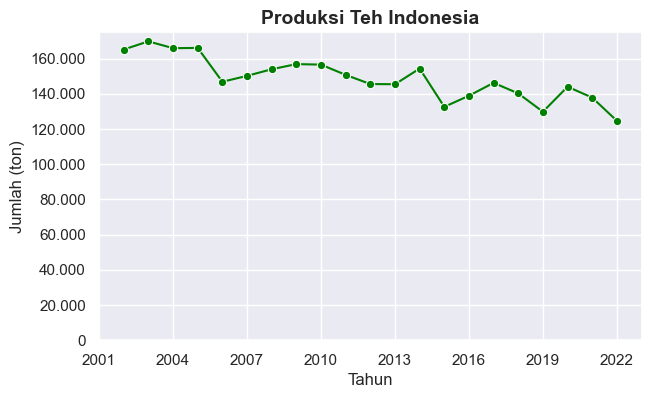

In [12]:
#Visualizing tea production trend over time
plt.figure(figsize=(7,4))
sns.lineplot(data=tea_prod, x='tahun', y='total_prod', marker='o', color='green')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0,175000)

plt.xlabel('Tahun')
plt.ylabel('Jumlah (ton)')
plt.title('Produksi Teh Indonesia', fontweight='bold', fontsize=14)

def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()

In [13]:
#Exploring data 4: Tea export and import
tea_eximp

,tahun,ekspor_ton,ekspor_nilai,impor_ton,impor_nilai
0,2002,100184,103427,3526,3651
1,2003,88894,95970,4000,3807
2,2004,98572,116018,3925,5531
3,2005,102572,121777,5479,7161
4,2006,95339,134515,5294,8703
5,2007,83659,125243,10366,11855
6,2008,96210,158958,6625,11990
7,2009,92304,171628,7169,12537
8,2010,87101,178548,10688,18198
9,2011,75450,166717,19812,27318


In [14]:
#Finding the maximum export value (tonnes)
max_idx= tea_eximp['ekspor_ton'].idxmax()
max_exp = tea_eximp['ekspor_ton'].loc[max_idx]
yearmax_exp = tea_eximp['tahun'].loc[max_idx]
print(max_exp, yearmax_exp)

102572 2005


In [15]:
#Calculating the difference between current value and the maximum value
curr_year_idx = tea_eximp['tahun'].idxmax()
curr_exp = tea_eximp['ekspor_ton'].loc[curr_year_idx]
pct_diff = (curr_exp - max_exp)/max_exp
print(f"{pct_diff:.1%}")

-56.1%


In [16]:
#Finding the maximum export value (000 USD)
max_idx= tea_eximp['ekspor_nilai'].idxmax()
max_expv = tea_eximp['ekspor_nilai'].loc[max_idx]
yearmax_expv = tea_eximp['tahun'].loc[max_idx]
print(max_expv, yearmax_expv)

178548 2010


In [17]:
#Calculating the difference between current value and the maximum value
curr_year_idx = tea_eximp['tahun'].idxmax()
curr_expv = tea_eximp['ekspor_nilai'].loc[curr_year_idx]
pct_diff = (curr_expv - max_expv)/max_expv
print(f"{pct_diff:.1%}")

-49.6%


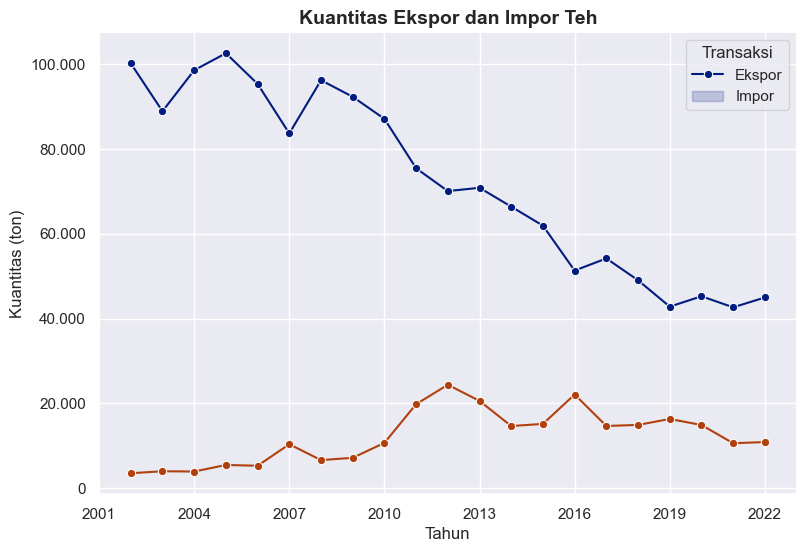

In [18]:
#Visualizing export and import quantity trend
tea_eximp_m = tea_eximp.melt(id_vars=['tahun'], value_vars=['ekspor_ton', 'impor_ton'], 
                             var_name='transaksi', value_name='jumlah')

plt.figure(figsize=(9,6))
sns.lineplot(data=tea_eximp_m, x='tahun', y='jumlah', hue='transaksi', marker='o', palette='dark')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Kuantitas Ekspor dan Impor Teh', fontweight='bold', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Kuantitas (ton)')
plt.legend(title='Transaksi', labels=['Ekspor', 'Impor'])
plt.grid(True)

def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()

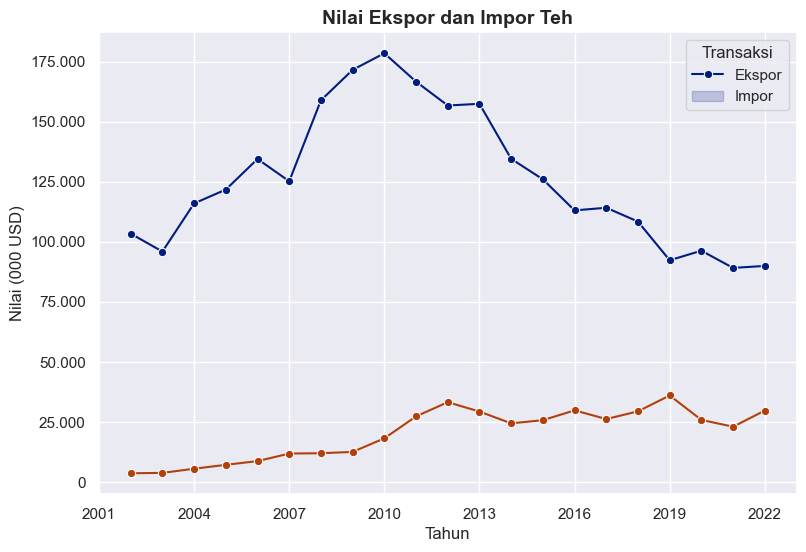

In [19]:
#Visualizing export and import value trend
tea_eximp_m = tea_eximp.melt(id_vars=['tahun'], value_vars=['ekspor_nilai', 'impor_nilai'], 
                             var_name='transaksi', value_name='nilai')

plt.figure(figsize=(9, 6))
sns.lineplot(data=tea_eximp_m, x='tahun', y='nilai', hue='transaksi', marker='o', palette='dark')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Nilai Ekspor dan Impor Teh', fontweight='bold', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Nilai (000 USD)')
plt.legend(title='Transaksi', labels=['Ekspor', 'Impor'])
plt.grid(True)

def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()

In [20]:
#Exploring data 5: Export comparison with other commodities
export_comp

,tahun,teh_ton,kopi_ton,kakao_ton,sawit_ton,karet_ton
0,2002,100184,325009,465622,2348638,1495987.0
1,2003,88894,323520,355726,2719304,1662210.0
2,2004,98572,344077,366855,3944457,1874261.0
3,2005,102572,445829,463632,4344303,2024593.0
4,2006,95339,413500,609035,4139286,2286897.0
5,2007,83659,321404,503522,8866445,2407972.0
6,2008,96210,468749,515523,14110229,2283158.0
7,2009,92304,433600,535236,11605431,1991533.0
8,2010,87101,433595,552880,15413639,2351915.0
9,2011,75450,346493,410257,19753190,2556233.0


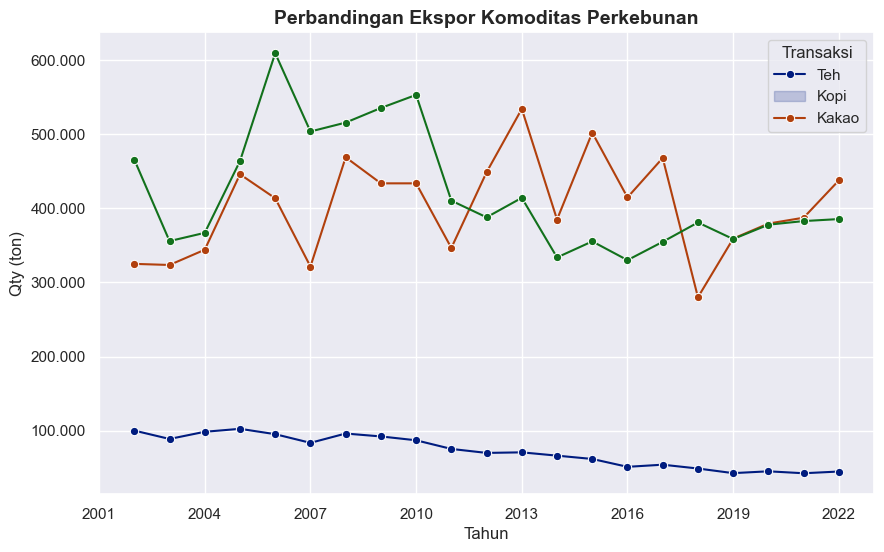

In [21]:
#Visualizing trend
export_comp_m = export_comp.melt(id_vars=['tahun'], value_vars=['teh_ton', 'kopi_ton', 'kakao_ton'], 
                             var_name='komoditas', value_name='jumlah')

plt.figure(figsize=(10, 6))
sns.lineplot(data=export_comp_m, x='tahun', y='jumlah', hue='komoditas', marker='o', palette='dark')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Perbandingan Ekspor Komoditas Perkebunan', fontweight='bold', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Qty (ton)')
plt.legend(title='Transaksi', labels=['Teh', 'Kopi', 'Kakao'])
plt.grid(True)

def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()

In [27]:
#Calculating domestic consumption based on the difference between production plus export and import
tea_cons = pd.DataFrame({
    'tahun': tea_prod['tahun'],
    'produksi': tea_prod['total_prod'],
    'ekspor': tea_eximp['ekspor_ton'],
    'impor': tea_eximp['impor_ton']
})
tea_cons = tea_cons.assign(konsumsi = tea_cons['produksi'] + tea_cons['impor'] - tea_cons['ekspor'])
tea_cons

,tahun,produksi,ekspor,impor,konsumsi
0,2002,165194,100184,3526,68536
1,2003,169821,88894,4000,84927
2,2004,165951,98572,3925,71304
3,2005,166091,102572,5479,68998
4,2006,146859,95339,5294,56814
5,2007,150223,83659,10366,76930
6,2008,153971,96210,6625,64386
7,2009,156901,92304,7169,71766
8,2010,156604,87101,10688,80191
9,2011,150776,75450,19812,95138


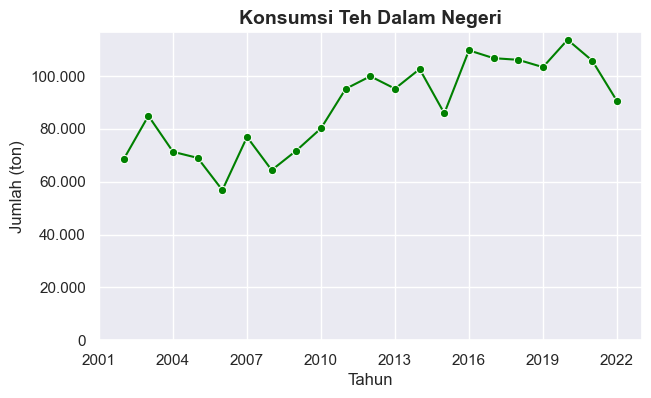

In [28]:
#Visualizing domestic tea consumption trend over time
plt.figure(figsize=(7, 4))
sns.lineplot(data=tea_cons, x='tahun', y='konsumsi', marker='o', color='green')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0,None)

plt.xlabel('Tahun')
plt.ylabel('Jumlah (ton)')
plt.title('Konsumsi Teh Dalam Negeri', fontweight='bold', fontsize=14)

def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()